In [40]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [41]:
# set random seed
import random
random.seed(335)

In [42]:
# magic word
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [43]:
# for better viz
import pprint
import warnings
warnings.filterwarnings('ignore')

# data preparation
---------------------
The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times and not in any prescribed order. Tasks include table, record and attribute selection as well as transformation and cleaning of data for modeling tools.

## select and clean data
----------

In [44]:
df = pd.read_csv('/Users/esadmazi/Desktop/INNO/COURSES/DMining/LAB/CRISP-DMtemplate/Listings.csv')

In [47]:

# Calculate the percentage of NaN or empty values in each column
nan_percentage = df.isnull().sum() / len(df)

# Filter columns that have more than 40% NaN or empty values
columns_to_drop1 = ['id','refresh','last_update','district_id','city_id','create_time','createdAt','updatedAt',
"user_id", "uri", "title", "content", "imgs", "path", "user.name", "user.phone", "user.img"]

columns_to_drop2 = nan_percentage[nan_percentage > 0.4].index

# Drop the filtered columns from the DataFrame
df = df.drop(columns=columns_to_drop2)
# Display the cleaned DataFrame


In [48]:
df =  df.drop(columns=columns_to_drop1)

In [49]:
df.shape

(663946, 19)

In [50]:
null_counts = df.isnull().sum()
print(null_counts)

price                     0
category                  0
beds                 252609
livings              252119
wc                   254128
area                    577
street_width          18982
age                  253127
street_direction      94891
furnished            238949
location.lat              0
location.lng              0
user.review          118066
user.iam_verified      3714
city                      0
district                  0
width                 57444
length                57641
advertiser_type       23932
dtype: int64


In [51]:
df.head(2)

,price,category,beds,livings,wc,area,street_width,age,street_direction,furnished,location.lat,location.lng,user.review,user.iam_verified,city,district,width,length,advertiser_type
0,1958400.0,2,0.0,0.0,0.0,816.0,60.0,0.0,4.0,0.0,24.54893,46.78139,3.83,1.0,الرياض,حي الدار البيضاء,25.0,32.0,NaN
1,15078000.0,2,0.0,0.0,0.0,1077.0,80.0,0.0,4.0,0.0,24.75413,46.72482,4.56,1.0,الرياض,حي المغرزات,NaN,NaN,NaN


In [52]:
nan_count = df['area'].isnull().sum()
print("Number of NaN values in the 'area' column:", nan_count)

df = df.dropna(subset=['area'])

Number of NaN values in the 'area' column: 577


In [53]:
nan_count = df['street_width'].isnull().sum()
print("Number of NaN values in the 'street_width' column:", nan_count)

# Drop rows where "advertiser" column is NaN
df = df.dropna(subset=['street_width'])

Number of NaN values in the 'street_width' column: 18420


In [54]:
nan_count = df['user.review'].isnull().sum()
print("Number of NaN values in the 'user.review' column:", nan_count)

# Drop rows where "advertiser" column is NaN
df = df.dropna(subset=['user.review'])

Number of NaN values in the 'user.review' column: 113586


In [55]:
nan_count = df['user.iam_verified'].isnull().sum()
print("Number of NaN values in the 'user.iam_verified' column:", nan_count)

# Drop rows where "advertiser" column is NaN
df = df.dropna(subset=['user.iam_verified'])

Number of NaN values in the 'user.iam_verified' column: 3410


In [56]:
nan_count = df['advertiser_type'].isnull().sum()
print("Number of NaN values in the 'advertiser_type' column:", nan_count)

df = df.dropna(subset=['advertiser_type'])

Number of NaN values in the 'advertiser_type' column: 18152


In [57]:
nan_count = df['street_direction'].isnull().sum()
print("Number of NaN values in the 'street_direction' column:", nan_count)

df = df.dropna(subset=['street_direction'])

Number of NaN values in the 'street_direction' column: 71135


In [58]:
nan_count = df['width'].isnull().sum()
print("Number of NaN values in the 'width' column:", nan_count)

df = df.dropna(subset=['width'])

Number of NaN values in the 'width' column: 41433


In [59]:
nan_count = df['length'].isnull().sum()
print("Number of NaN values in the 'length' column:", nan_count)

df = df.dropna(subset=['length'])

Number of NaN values in the 'length' column: 218


In [60]:
df.shape

(397015, 19)

In [61]:
(df['user.iam_verified']==0).sum()

3470

In [62]:
df= df[df['user.iam_verified'] != 0]
df = df.drop(columns='user.iam_verified')

In [63]:
df.shape

(393545, 18)

In [64]:
null_counts = df.isnull().sum()
print(null_counts)

price                    0
category                 0
beds                159604
livings             159576
wc                  159580
area                     0
street_width             0
age                 152966
street_direction         0
furnished           149326
location.lat             0
location.lng             0
user.review              0
city                     0
district                 0
width                    0
length                   0
advertiser_type          0
dtype: int64


In [65]:
df.fillna(0, inplace=True)

In [66]:
df.shape

(393545, 18)

# RENTAL VS SELLS SPLIT

In [67]:
# Define a function to categorize based on 'category' attribute
def categorize_rental_sell(category):
    if category in [1, 4, 5, 8, 11, 13, 14, 15, 16, 17, 18, 19, 23]:
        return 'Rental'
    elif category in [2, 3, 5, 7, 9, 10, 12, 20, 21, 22]:
        return 'Sell'

# Apply the function to create a new column 'category_type'
df['category_type'] = df['category'].apply(categorize_rental_sell)

# Display the first few rows of the DataFrame
# Split the DataFrame into rentals and sells
rentals_df = df[df['category_type'] == 'Rental']
sells_df = df[df['category_type'] == 'Sell']

In [68]:
sells_df.shape

(303658, 19)

In [69]:
df = sells_df.drop(['category_type'], axis=1)
df.head(2)

,price,category,beds,livings,wc,area,street_width,age,street_direction,furnished,location.lat,location.lng,user.review,city,district,width,length,advertiser_type
2286,800000.0,2,0.0,0.0,0.0,750.0,15.0,0.0,4.0,0.0,25.160826,46.421780,4.35,الرياض,حي بنبان,30.0,25.0,agent
2295,250000.0,2,0.0,0.0,0.0,920.0,30.0,0.0,3.0,0.0,24.639906,39.306129,4.29,المدينة المنورة,حي البلقاء,30.0,30.0,agent


## construct data
----------

In [70]:
df['district']

2286          حي بنبان
2295        حي البلقاء
2299      حي الملك فهد
2307         حي الرمال
2320            حي بيش
              ...     
663927     حي الفيصلية
663931       حي النخيل
663942        حي البحر
663943       حي الكوثر
663944        حي البحر
Name: district, Length: 303658, dtype: object

In [71]:
df["city"].unique()

array(['الرياض', 'المدينة المنورة', 'بيش', 'تبوك', 'الخبر', 'الدمام',
       'الظهران', 'المجاردة', 'صبيا', 'المزاحمية', 'بريدة', 'مكة المكرمة',
       'المجمعة', 'الطائف', 'البدائع', 'جدة', 'حوطة بني تميم', 'الخرج',
       'جازان', 'عنيزة', 'الرس', 'الجبيل', 'حائل',
       'مدينة الملك عبدالله الاقتصادية', 'ابو عريش', 'الزلفي', 'ابها',
       'الباحة', 'الهفوف', 'خميس مشيط', 'ثادق', 'محايل', 'سيهات', 'سكاكا',
       'بقيق', 'عفيف', 'راس تنورة', 'شقراء', 'احد المسارحة', 'رابغ',
       'الدرعية', 'حفر الباطن', 'البكيرية', 'القويعية', 'المذنب', 'الغاط',
       'رفحاء', 'رياض الخبراء', 'الدوادمي', 'القنفذة', 'صفوى', 'تربه',
       'النعيرية', 'بقعاء', 'دومة الجندل', 'الدلم', 'الخفجي', 'الغزالة',
       'العلا', 'بيشة', 'النبهانية', 'احد رفيده', 'صامطة', 'الشنان',
       'رماح', 'الشماسية', 'الحناكية', 'العيون', 'القطيف', 'الهياثم',
       'ثول', 'تثليث', 'املج', 'ينبع', 'الجموم', 'عرعر', 'رنية', 'الليث',
       'نجران', 'تاروت', 'الحريق', 'ضبا', 'السليل', 'بللسمر', 'مهد الذهب',
       'شر

In [72]:
city_translation = {
    'المدينة المنورة': 'Medina',
    'احد رفيده': 'Ahad Rafidah', #
    'الرياض': 'Riyadh',
    'الطائف': 'Taif',
    'حائل': 'Hail',
    'جدة': 'Jeddah',
    'صفوى': 'Safwa',
    'الجبيل': 'Al Jubail',
    'بريدة': 'Buraydah',
    'الهياثم': 'Al Hayatham',
    'الدمام': 'Dammam',
    'الهفوف': 'Hofuf',
    'الظهران': 'Dhahran',
    'خميس مشيط': 'Khamis Mushait',
    'ابها': 'Abha',
    'الخرج': 'Al Kharj',
    'تثليث': 'Tathleeth',
    'الخبر': 'Al Khobar',
    'الغزالة': 'Al Ghazalah',
    'الدرعية': 'Diriyah',
    'حفر الباطن': 'Hafr Al-Batin',
    'الزلفي': 'Zulfi',
    'تبوك': 'Tabuk',
    'تربه': 'Turubah',
    'المزاحمية': 'Al-Muzahmiyyah',
    'مكة المكرمة': 'Mecca',
    'جازان': 'Jazan',
    'ابو عريش': 'Abu Arish',
    'صبيا': 'Sabia',
    'القويعية': 'Al Qwayiyah',
    'الدوادمي': 'Al Dawadmi',
    'الباحة': 'Al Baha',
    'رياض الخبراء': 'Riyadh Al Khabra',
    'ثول': 'Thawal',
    'محايل': 'Mahayel',
    'الرس': 'Ar Rass',
    'البكيرية': 'Al Bukayriyah',
    'املج': 'Umluj',
    'عنيزة': 'Unaizah',
    'بقيق': 'Buqayq',
    'ثادق': 'Thadq',
    'مدينة الملك عبدالله الاقتصادية': 'King Abdullah Economic City',
    'النعيرية': 'An Nuayriyah',
    'القطيف': 'Al Qatif',
    'بيشة': 'Bisha',
    'الخفجي': 'Al Khafji',
    'احد المسارحة': 'Ahad Al Masarihah',
    'صامطة': 'Samitah',
    'شقراء': 'Shaqra',
    'تاروت': 'Tarout',
    'النبهانية': 'An Nabhaniah',
    'بدر': 'Badr',
    'عفيف': 'Afif',
    'نجران': 'Najran',
    'رابغ': 'Rabigh',
    'حوطة بني تميم': 'Hawtat Bani Tamim',
    'رفحاء': 'Rafha',
    'سكاكا': 'Sakaka',
    'المجاردة': 'Al Majarda',
    'رماح': 'Rumah',
    'بقعاء': 'Buqa',
    'البدائع': 'Al Badaea',
    'العلا': 'Al Ula',
    'مهد الذهب': 'Mehd Al Thahab',
    'دومة الجندل': 'Dhama Al Jandal',
    'بيش': 'Bish',
    'شرورة': 'Sharurah',
    'الشماسية': 'Ash Shamasiah',
    'عنك': 'Anak',
    'سيهات': 'Sayhat',
    'الليث': 'Al Laith',
    'الجموم': 'Al Jamum',
    'المذنب': 'Al Mudhnab',
    'الدلم': 'Ad Dilam',
    'القنفذة': 'Al Qunfudhah',
    'طريف': 'Turaif',
    'الشنان': 'Ash Shanan',
    'المبرز': 'Al Mubarraz',
    'عرعر': 'Arar',
    'السليل': 'As Sulayyil',
    'خيبر': 'Khaybar',
    'ينبع': 'Yanbu',
    'الحناكية': 'Al Hanakiyah',
    'الغاط': 'Al Ghata',
    'راس تنورة': 'Ras Tanura',
    'بللسمر': 'Balasmar',
    'الخرمة': 'Al Khurmah',
    'ضبا': 'Dhahaban',
    'الوجه': 'Al Wajh',
    'الكامل': 'Al Kamel',
    'الحريق': 'Al Hariq',
    'القريات': 'Al Qurayyat',
    'تيماء': 'Tayma',
    'العيون': 'Al Uyun',
    'رنية': 'Raniya'
}


In [73]:
# Create a new column 'english_city' by mapping Arabic city names to English names
df['city_en'] = df['city'].map(city_translation)

# Display the DataFrame
df['city_en']

2286         Riyadh
2295         Medina
2299         Medina
2307         Riyadh
2320           Bish
            ...    
663927       Dammam
663931       Dammam
663942    Al Khobar
663943    Al Khobar
663944    Al Khobar
Name: city_en, Length: 303658, dtype: object

In [74]:
cities_not_exist = ['Al Hayatham', 'Tathleeth', 'Al-Muzahmiyyah', 'Al Qwayiyah', 'Al Dawadmi', 'Thawal', 'Mahayel', 'An Nuayriyah', 'An Nabhaniah', 'Al Majarda', 'Al Badaea', 'Mehd Al Thahab', 'Dhama Al Jandal', 'Ash Shamasiah', 'Al Laith', 'Al Jamum', 'Al Mudhnab', 'Ash Shanan', 'Balasmar']

# Filter out rows with cities that do not exist
df = df[~df['city_en'].isin(cities_not_exist)]

In [75]:
import requests
from geopy.distance import geodesic

def get_city_center_coordinates(city_name):
    """
    Get the coordinates of the city center using OpenStreetMap Nominatim API.
    """
    url = f"https://nominatim.openstreetmap.org/search?city={city_name}&format=json&limit=1"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
        else:
            return None
    else:
        print("Failed to retrieve city center coordinates.")
        return None


In [76]:
df_cities = pd.DataFrame({'city_en': list(city_translation.values())})
df_cities = df_cities[~df_cities['city_en'].isin(cities_not_exist)]
df_cities['lat'] = df_cities['city_en'].apply(lambda x: get_city_center_coordinates(x)[0])
df_cities['lng'] = df_cities['city_en'].apply(lambda x: get_city_center_coordinates(x)[1])

In [77]:
df_cities.head()

,city_en,lat,lng
0,Medina,45.015136,-93.574375
1,Ahad Rafidah,18.181409,42.841358
2,Riyadh,18.010714,-15.955326
3,Taif,21.270280,40.415831
4,Hail,27.520872,41.698599


In [78]:
import pandas as pd
from geopy.distance import geodesic

# Assuming df_cities has columns 'city_en', 'lat', 'lag'
# Assuming df_cleaned has columns 'location.lat', 'location.lng', and 'city_en'

# Merge df_cleaned with df_cities on 'city_en'
df = pd.merge(df, df_cities, on='city_en', how='left')
df.dropna(subset=['lat'], inplace=True)

In [79]:
# Calculate distances between each row's location and city center
df['distance_to_center'] = df.apply(
    lambda row: geodesic((row['location.lat'], row['location.lng']), (row['lat'], row['lng'])).kilometers,
    axis=1
)

In [80]:
# price_per_m2
df['price_per_m2'] = df['price'] / df['area']

In [81]:
df.head()

,price,category,beds,livings,wc,area,street_width,age,street_direction,furnished,location.lat,location.lng,user.review,city,district,width,length,advertiser_type,city_en,lat,lng,distance_to_center,price_per_m2
0,800000.0,2,0.0,0.0,0.0,750.0,15.0,0.0,4.0,0.0,25.160826,46.421780,4.35,الرياض,حي بنبان,30.0,25.0,agent,Riyadh,18.010714,-15.955326,6454.112014,1066.666667
1,250000.0,2,0.0,0.0,0.0,920.0,30.0,0.0,3.0,0.0,24.639906,39.306129,4.29,المدينة المنورة,حي البلقاء,30.0,30.0,agent,Medina,45.015136,-93.574375,10937.868420,271.739130
2,1200000.0,10,5.0,2.0,3.0,700.0,20.0,10.0,4.0,0.0,24.501982,39.721149,3.80,المدينة المنورة,حي الملك فهد,20.0,35.0,agent,Medina,45.015136,-93.574375,10972.831431,1714.285714
3,1312500.0,2,0.0,0.0,0.0,375.0,20.0,0.0,2.0,0.0,24.846313,46.796188,4.30,الرياض,حي الرمال,13.0,28.0,normal_marketer,Riyadh,18.010714,-15.955326,6495.591391,3500.000000
4,400000.0,9,4.0,1.0,3.0,600.0,10.0,0.0,1.0,1.0,17.702763,42.267738,5.00,بيش,حي بيش,30.0,20.0,owner,Bish,42.108934,-73.492262,10682.881200,666.666667


In [82]:
df= df.drop(columns=['city_en','lat','lng'])

In [83]:
'''from sklearn.preprocessing import OneHotEncoder
import pandas as pd

Define mapping of category codes to labels
category_mapping = {
    1: 'Apartment, rental',
    2: 'Land, sell',
    3: 'Villa, sell',
    4: 'Floor, rental',
    5: 'Villa, rental',
    6: 'Apartment, sell',
    7: 'Building, sell',
    8: 'Store, rental',
    9: 'House, sell',
    10: 'Esterahah, sell',
    11: 'House, rental',
    12: 'Farm, sell',
    13: 'Esterahah, rental',
    14: 'Office, rental',
    15: 'Land, rental',
    16: 'Building, rental',
    17: 'Warehouse, rental',
    18: 'Campsite, rental',
    19: 'Room, rental',
    20: 'Store, sell',
    21: 'Furnished apartment',
    22: 'Floor, sell',
    23: 'Chalet, rental'
}

Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

Fit and transform the data
encoded_data = encoder.fit_transform(df[['category']])

Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['category']))

Rename columns using the mapping
encoded_df.columns = [category_mapping[int(col.split('_')[1])] for col in encoded_df.columns]

Concatenate the original DataFrame with the encoded DataFrame
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
merged_df = pd.concat([df, encoded_df], axis=1)'''

In [84]:
#df = merged_df.drop(columns="category")

In [85]:
df.head()

,price,beds,livings,wc,area,street_width,age,street_direction,furnished,location.lat,location.lng,user.review,city,district,width,length,advertiser_type,distance_to_center,price_per_m2,"Land, sell","Villa, sell","Building, sell","House, sell","Esterahah, sell","Farm, sell","Store, sell",Furnished apartment,"Floor, sell"
0,800000.0,0.0,0.0,0.0,750.0,15.0,0.0,4.0,0.0,25.160826,46.421780,4.35,الرياض,حي بنبان,30.0,25.0,agent,6454.112014,1066.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,250000.0,0.0,0.0,0.0,920.0,30.0,0.0,3.0,0.0,24.639906,39.306129,4.29,المدينة المنورة,حي البلقاء,30.0,30.0,agent,10937.868420,271.739130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1200000.0,5.0,2.0,3.0,700.0,20.0,10.0,4.0,0.0,24.501982,39.721149,3.80,المدينة المنورة,حي الملك فهد,20.0,35.0,agent,10972.831431,1714.285714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1312500.0,0.0,0.0,0.0,375.0,20.0,0.0,2.0,0.0,24.846313,46.796188,4.30,الرياض,حي الرمال,13.0,28.0,normal_marketer,6495.591391,3500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400000.0,4.0,1.0,3.0,600.0,10.0,0.0,1.0,1.0,17.702763,42.267738,5.00,بيش,حي بيش,30.0,20.0,owner,10682.881200,666.666667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df.rename(columns={
    'location.lat': 'location_lat',
    'location.lng': 'location_lng',
    'user.review': 'user_review',
}, inplace=True)

In [87]:
df_test = df

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_per_m2'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'length'}>, <Axes: >]], dtype=object)

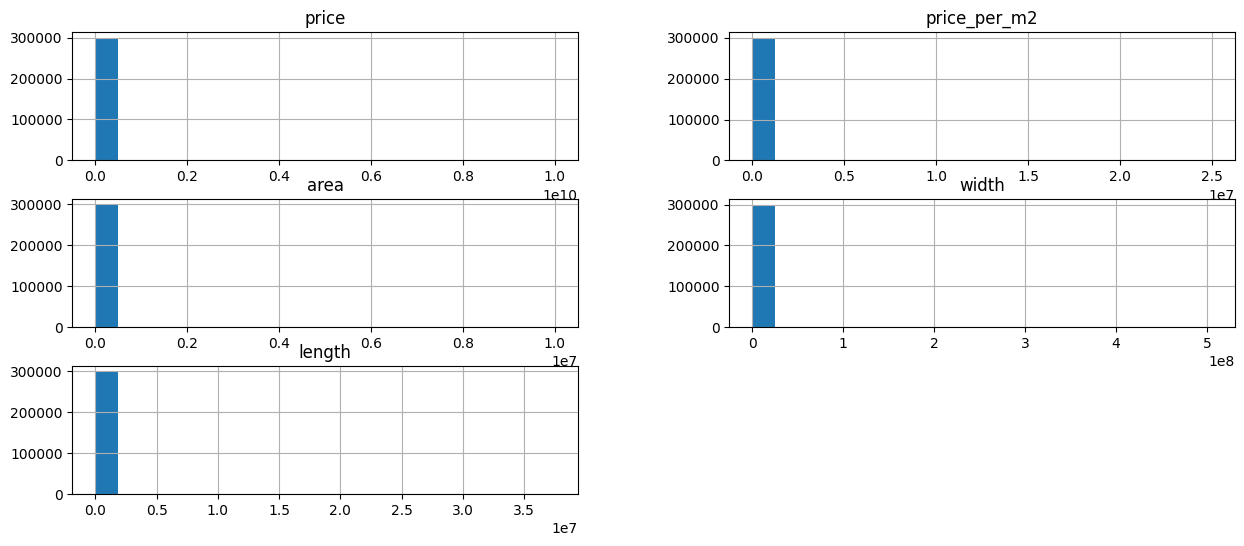

In [88]:
df_test.hist(column=['price','price_per_m2','area', 'width', 'length'],bins=20, figsize=(15,6))

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_per_m2'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'length'}>, <Axes: >]], dtype=object)

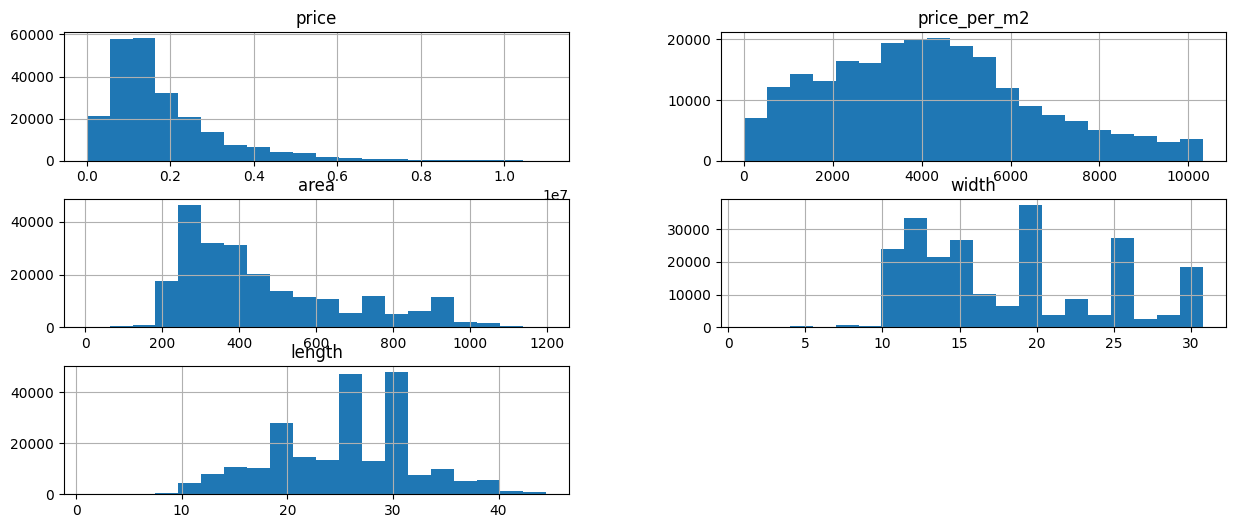

In [89]:
df_test = df_test[df_test['price'] < df_test['price'].quantile(0.95)]
df_test = df_test[df_test['area'] < df_test['area'].quantile(0.95)]
df_test = df_test[df_test['price_per_m2'] < df_test['price_per_m2'].quantile(0.95)]
df_test = df_test[df_test['width'] < df_test['width'].quantile(0.95)]
df_test = df_test[df_test['length'] < df_test['length'].quantile(0.95)]

df_test.hist(column=['price','price_per_m2','area','width','length'],bins=20, figsize=(15,6))

In [90]:
df_test['total_rooms'] = df_test['beds'] + df_test['livings'] + df_test['wc']
df = df_test

In [91]:
district_target_means = df.groupby('district')['price'].mean()
city_target_means = df.groupby('city')['price'].mean()

df['district_encoded'] = df['district'].map(district_target_means)

# Map mean values to cities
df['city_encoded'] = df['city'].map(city_target_means)

In [94]:
df.drop(columns=["city","district"], inplace=True)

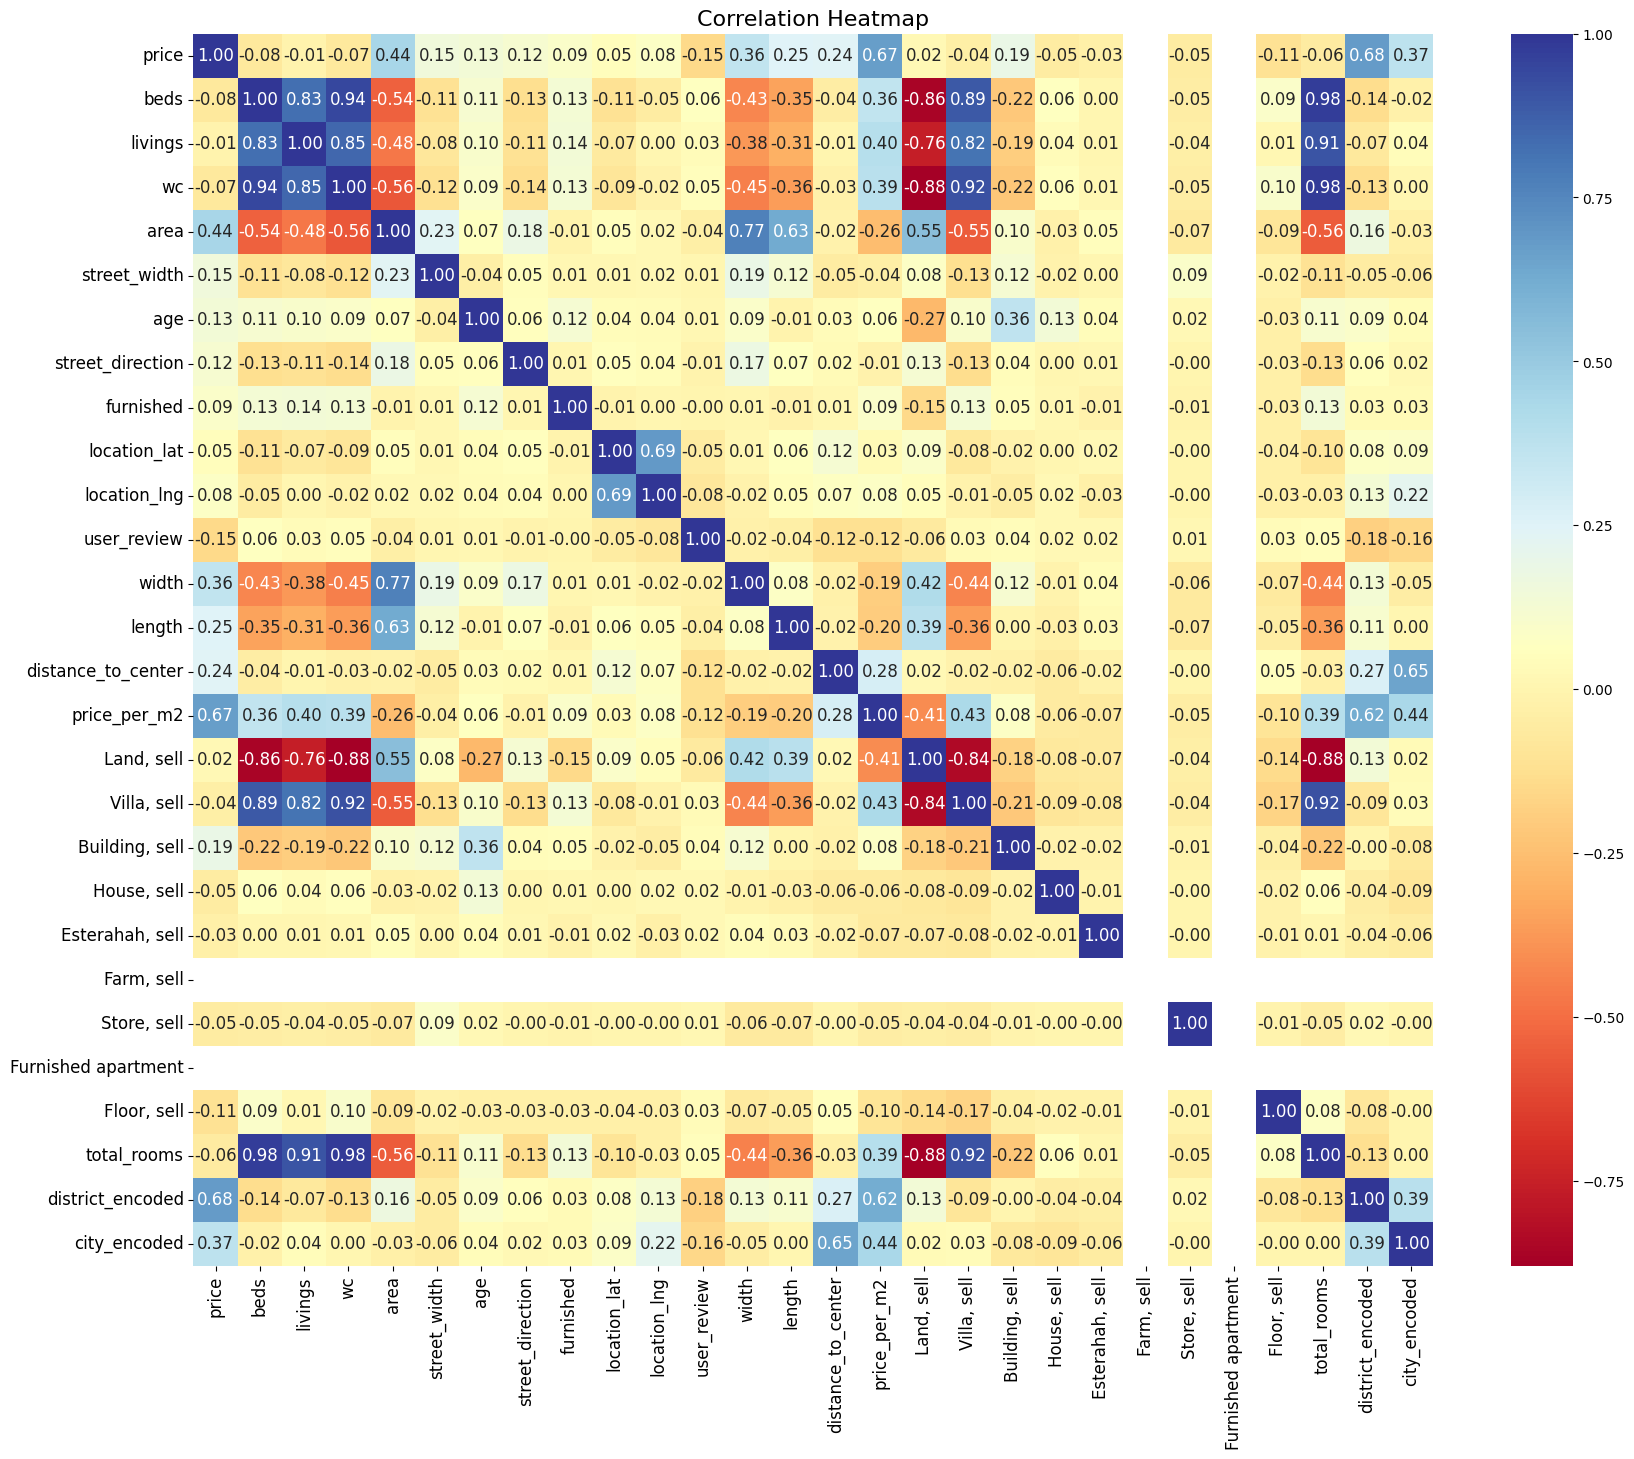

In [95]:
import seaborn as sns
# Create a heatmap using seaborn
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)  # Add a title to the plot
plt.xticks(fontsize=12)  # Increase x-axis tick label font size
plt.yticks(fontsize=12)  # Increase y-axis tick label font size
plt.show()

In [96]:
df.to_csv('listing_preprocessed_wo_category.csv', index=False)  # Set index=False to exclude row numbers in the CSV